# Image processing starter kit

There are a number of [images](https://github.com/parrt/msan501/raw/master/projects/figures/project-images.zip) we will use in this project so please download and unzip them.  Make sure that you save the zip file in the repository for the class. The files are called: phobos2.jpg, obama.png, Veggies_noise.jpg, eye.png, guesswho.png, pcb.png, bonkers.png.  Make sure the files are in the same repo directory as your `images.ipynb` file (a copy of this notebook renamed).

## View

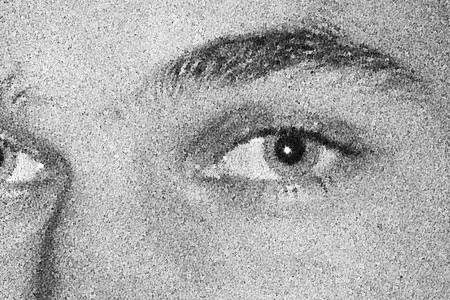

In [11]:
from PIL import Image

img = Image.open('eye.png')
img = img.convert("L") # grayscale
img   # same as display(img)

## Flip

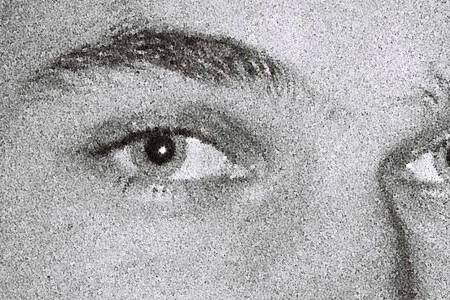

In [2]:
# define function flip()
# open 'eye.png', convert to grayscale, flip, and display
def flip(img):
    img = Image.open(img)
    width, height = img.size
    img_copy = img.copy()
    img_load = img.load()
    img_copy_load = img_copy.load()
    
    for i in range(width):
        for j in range(height):
            img_copy_load[i,j] = img_load[width - 1 - i,j]
    return img_copy

flipped_eye = flip('eye.png')
flipped_eye

## Blur

In [5]:
# define getpixel, region3x3, avg, and blur functions
def blur(img):
    width, height = img.size
    img_copy = img.copy()
    pixel = img_copy.load()
    for x in range(width):
        for y in range(height):
            r = region3x3(img, x, y)
            pixel[x,y] = avg(r)
    return img_copy
    
def avg(data):
    return sum(data) // len(data)

def region3x3(img, x, y):
    """Takes in an image and coordinates as arguments
    Returns a list of the valid pixel measurements in the surrounding 3x3 grid"""
    lst, pixel = [], img.load()
    for i in range(x - 1, x + 2):
        for j in range(y - 1, y + 2):
            lst.append(getpixel(img, i, j))
    return lst
            
def getpixel(img, x, y):
    """Takes in an image and coordinates as arguments
    Tests for validity of the pixel, and if it's invalid
    then it selects and returns the nearest valid pixel"""
    width, height = img.size
    pixel = img.load()
    if x < 0:
        x = 0
    elif x >= width:
        x = width - 1
    if y < 0:
        y = 0
    elif y >= height:
        y = height - 1
    return pixel[x, y]

img = Image.open('pcb.png')
img = img.convert("L") # make greyscale if not already (luminance)

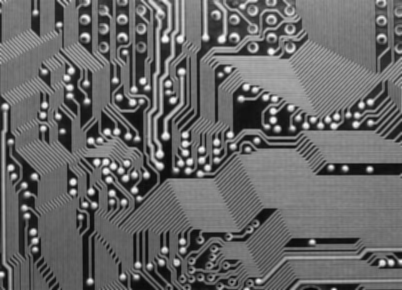

In [6]:
img = blur(img)
img

## Denoise

In [9]:
# define median and denoise functions
def median(lst):
    lst.sort()
    return lst[len(lst) // 2]

def denoise(img):
    width, height = img.size
    img_copy = img.copy()
    pixel = img_copy.load()
    for x in range(width):
        for y in range(height):
            r = region3x3(img, x, y)
            pixel[x,y] = median(r)
    return img_copy

In [28]:
img = Image.open('Veggies_noise.jpg')
img = img.convert("L") # make greyscale if not already (luminance)
#resized(img, 300)


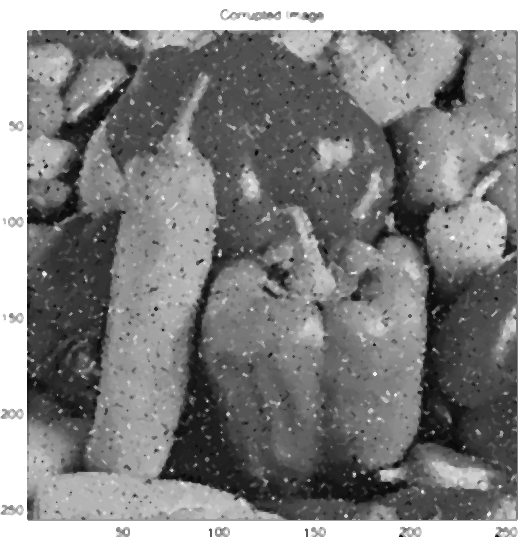

In [29]:
# denoise 3 times and display
denoise(denoise(denoise(img)))

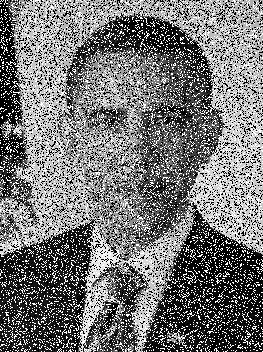

In [31]:
# show 'guesswho.png'
img = Image.open('guesswho.png')
img = img.convert("L")
img

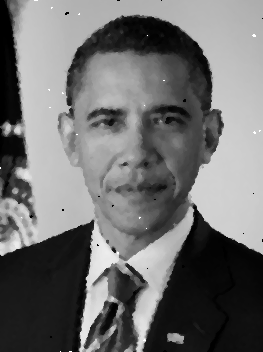

In [37]:
# denoise 3 times then display
denoise(denoise(denoise(img)))

## Generic filter

In [49]:
# define filterAnd open functions
def open(argv):
    img = Image.open(argv[1])
    img = img.convert("L")
    return img

#The provided open function was giving me problems
#So I am re-writing it to make it work with the provided code

def open(argv):
    img = Image.open(argv)
    img = img.convert("L")
    return img

def filter(img, f):
    width, height = img.size
    img_copy = img.copy()
    pixel = img_copy.load()
    for x in range(width):
        for y in range(height):
            r = region3x3(img, x, y)
            pixel[x,y] = f(r)
    return img_copy

blurred = filter(img, avg)
denoised = filter(img, median)

### Blur refactored

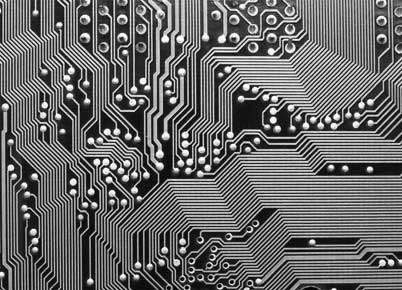

In [50]:
# Display 'pcb.png'
img = open('pcb.png')
img

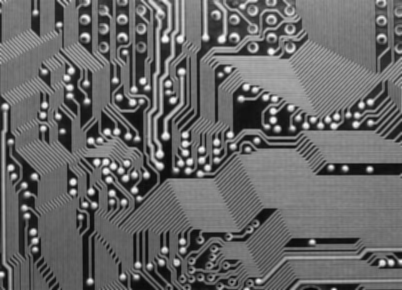

In [51]:
# use filter to blur the image
filter(img, avg)

### Denoise refactored

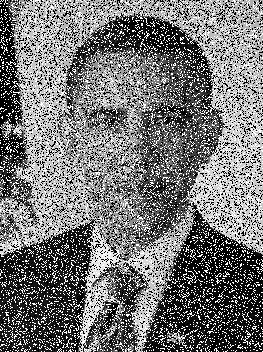

In [52]:
img = open('guesswho.png')
img

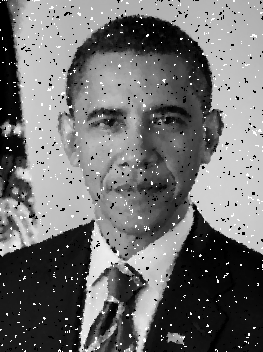

In [53]:
# using filter function, denoise the image
filter(img, median)

## Edges

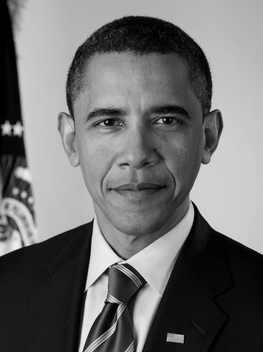

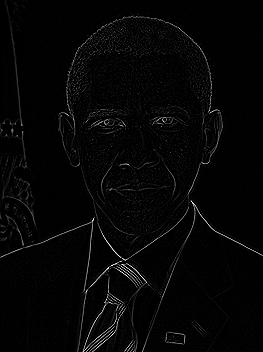

In [55]:
# define laplace function
# Open 'obama.png' and show the edges
def laplace(lst):
    """The indexing is a result of how I wrote my nested for loops
    to get the pixels"""
    return lst[1] + lst[3] + lst[5] + lst[7] - 4 * lst[4]

img = open('obama.png')
display(img)
edges = filter(img, laplace)
edges

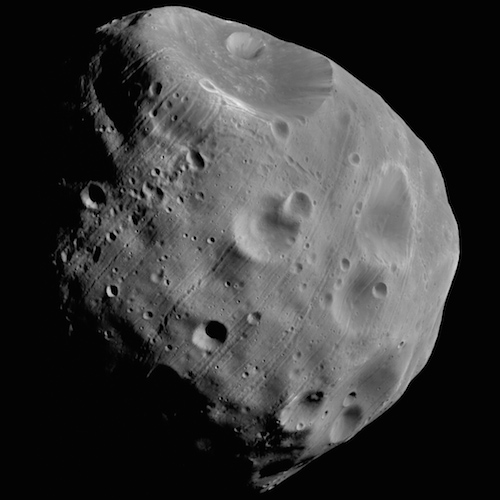

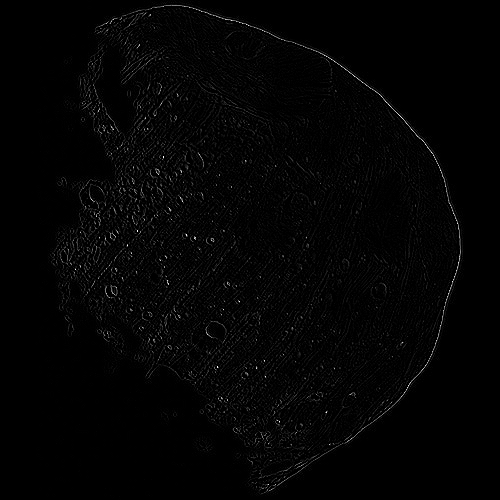

In [56]:
# Show the edges for 'phobos2.jpg

img = open('phobos2.jpg')
display(img)
edges = filter(img, laplace)
edges

## Sharpen

In [ ]:
# define minus function

In [ ]:
# display 'bonkers.png'

In [ ]:
# sharpen that image and display it